# <center> Elementy numerycznej algebry liniowej </center>

residuum: a_x - b powinno być 0

Rozwiązywanie układów równań liniowych jest jednym z podstawowych problemów metod numerycznych. Układy równań liniowych występują w wielu dziedzinach nauki i inżynierii. Stosuje się też w uczeniu maszynowym np. podczas regresji z błędem średniokwadratowym. 


Istnieje kilka metod rozwiązywania układów równań. Na dzisiejszych zajęciach zajmiemy się:
* eliminacją Gaussa bez oraz z wyborem elementu głównego,
* metodami iteracyjnymi.

Problem rozwiązywania układu równań liniowych będzie nam towarzyszły do końca zajęć z tego przedmiotu.

## Normy i wskaźniki uwarunkowania

Wrażliwość układu (zmiana rozwiązania) na niewielkie zaburzenia wektora `b` zależy od macierzy `A` i ocenia się ja za pomocą tzw. współczynnika lub [wskaźnika uwarunkowania macierzy](https://pl.wikipedia.org/wiki/Wskaźnik_uwarunkowania) (ang. *condition number*). Im wyższa wartość tego wskaźnika. tym macierz jest gorzej uwarunkowana. Wskaźnik uwarunkowania to iloczyn normy macierzy z normą jej odwrotności.

$$cond(A)=|A|_{p}\cdot|A^{-1}|_{p}$$
gdzie *p* oznacza jedną z norm macierzy.

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

***Zadanie 1.***

Porównaj normy 1,2, $\infty$ następujących macierzy:
* [Hilberta](https://pl.wikipedia.org/wiki/Macierz_Hilberta): o wymiarach 5x5 i 15x15
* [Vandermonde'a](https://pl.wikipedia.org/wiki/Macierz_Vandermonde’a): o wymiarach 5x5 i 15x15
* losowej o wartościach z przedziału [0,1]:  o wymiarach 5x5 i 15x15
* $P=\left[\begin{array}{cccc}4 & 1 & -1 & 0 \\ 1 & 3 & -1 & 0 \\ -1 & -1 & 5 & 2 \\ 0 & 0 & 2 & 4\end{array}\right]$

Czy wśród powyższych macierzy jest macierz [diagonalnie dominująca](https://pl.wikipedia.org/wiki/Macierz_przekątniowo_dominująca)?


In [3]:
hilbert_5 = scipy.linalg.hilbert(5)
hilbert_15 = scipy.linalg.hilbert(15)
vandermonde_5 = np.vander(np.arange(1,6), increasing=True)
vandermonde_15 = np.vander(np.arange(1,16), increasing=True)
random_5 = np.random.rand(5,5)
random_15 = np.random.rand(15,15)
matrix_P = np.array([[4,1,-1,0],[1,3,-1,0],[-1,-1,5,2],[0,0,2,4]])

print('hilbert_5:')
print('norm 1: ',np.linalg.norm(hilbert_5, 1))
print('norm 2: ',np.linalg.norm(hilbert_5, 2))
print('norm ∞: ',np.linalg.norm(hilbert_5, np.inf))

print('hilbert_15:')
print('norm 1: ',np.linalg.norm(hilbert_15, 1))
print('norm 2: ',np.linalg.norm(hilbert_15, 2))
print('norm ∞: ',np.linalg.norm(hilbert_15, np.inf))

print('vandermonde_5:')
print('norm 1: ',np.linalg.norm(vandermonde_5, 1))
print('norm 2: ',np.linalg.norm(vandermonde_5, 2))
print('norm ∞: ',np.linalg.norm(vandermonde_5, np.inf))

print('vandermonde_15:')
print('norm 1: ',np.linalg.norm(vandermonde_15, 1))
print('norm 2: ',np.linalg.norm(vandermonde_15, 2))
print('norm ∞: ',np.linalg.norm(vandermonde_15, np.inf))

print('random_5:')
print('norm 1: ',np.linalg.norm(random_5, 1))
print('norm 2: ',np.linalg.norm(random_5, 2))
print('norm ∞: ',np.linalg.norm(random_5, np.inf))

print('random_15:')
print('norm 1: ',np.linalg.norm(random_15, 1))
print('norm 2: ',np.linalg.norm(random_15, 2))
print('norm ∞: ',np.linalg.norm(random_15, np.inf))

print('matrix_P:')
print('norm 1: ',np.linalg.norm(matrix_P, 1))
print('norm 2: ',np.linalg.norm(matrix_P, 2))
print('norm ∞: ',np.linalg.norm(matrix_P, np.inf))


hilbert_5:
norm 1:  2.283333333333333
norm 2:  1.567050691098231
norm ∞:  2.283333333333333
hilbert_15:
norm 1:  3.3182289932289937
norm 2:  1.8459277461534886
norm ∞:  3.3182289932289937
vandermonde_5:
norm 1:  979.0
norm 2:  695.8417585578524
norm ∞:  781.0
vandermonde_15:
norm 1:  4.603401533773348e+16
norm 2:  3.1583986904955172e+16
norm ∞:  3.127813502720424e+16
random_5:
norm 1:  3.086273955991346
norm 2:  2.5552135102872167
norm ∞:  3.354736667487717
random_15:
norm 1:  9.096035875290205
norm 2:  7.38592327132914
norm ∞:  8.9572402932092
matrix_P:
norm 1:  9.0
norm 2:  7.086130197651493
norm ∞:  9.0


*Wskazówka: Do wyznaczenia norm możesz wykorzystać funkcję `numpy.linalg.norm`*

***Zadanie 2.***

Oblicz wskaźniki uwarunkowania macierzy z poprzedniego zadania.

*Wskazówka: Możesz wykorzystać funkcję `numpy.linalg.cond`.*

In [4]:
print('hilbert_5: ', np.linalg.cond(hilbert_5))
print('hilbert_15: ', np.linalg.cond(hilbert_15))
print('vandermonde_5: ', np.linalg.cond(vandermonde_5))
print('vandermonde_15: ', np.linalg.cond(vandermonde_15))
print('random_5: ', np.linalg.cond(random_5))
print('random_15: ', np.linalg.cond(random_15))
print('matrix_P: ', np.linalg.cond(matrix_P))

hilbert_5:  476607.2502422687
hilbert_15:  3.67568286586649e+17
vandermonde_5:  26169.68797063654
vandermonde_15:  1.9860029339947945e+20
random_5:  59.43203966608729
random_15:  246.24568418642573
matrix_P:  3.543065098825747


## Rozwiązywanie układów równań metodą eliminacji Gaussa

***Zadanie 3.***

Jedną z metod rozwiązywania układów równań liniowych jest metoda eliminacji Gaussa. Metoda ta występuje w kilku odmianach. Poza podstawowym wariantem, możliwe jest zastosowanie metody z wyborem elementu głownego (tzw. *pivoting*). 

Celem tego zadania jest porównanie błędów rozwiązania otrzymanego z tych dwóch wariantów eliminacji Gaussa. Poniżej znajdują się implementacje obu tych metod. Każda z funkcji przyjmuje macierz `A` oraz wektor prawej strony równania `b`.

Samo polecenie znajduje się poniżej.

In [5]:
def gauss_pivot(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        ind_max = k
        for j in range(k+1, n):
            if abs(A[j,k]) > abs(A[ind_max,k]):
                ind_max = j
        if ind_max > k:
            tmp = A[ind_max,k:n].copy()
            A[ind_max,k:n] = A[k,k:n]
            A[k,k:n] = tmp
            tmp = b[ind_max].copy()
            b[ind_max] = b[k]
            b[k] = tmp
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

In [6]:
def gauss(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

Stwórz macierze wartości losowych `A` o wymiarach 10x10 oraz wektor `b` o odpowiednich wymiarach. 
Chcemy rozwiązać układ równań `Ax=b` metodami eliminacji Gaussa bez oraz z wyborem elementu głównego, a następnie porównać dokładność wyników. Metoda z wyborem elementu głównego powinna dawać mniejszy błąd w przypadku dużych wartości znajdujących się na przekątnej. Sprawdź czy to prawda powtarzając obliczenia z  macierzami `A` zawierającym na pierwszym elemencie przekątnej coraz to mniejsze wartości (tak aby wzrosło znaczenie dalszych elementów na przękątnej i tym samym uaktywnił się wybór innego niż pierwszy elementu głównego).

Wskazówka:Do porównania możesz wykorzystać residuum. Jeżeli `x` jest rozwiązaniem układu to `Ax` powinno być równe `b`. Residuum to różnica pomiędzy `b` oraz `Ax`: `res=|b-Ax|`. Możesz porównać zawartości poszczególnych elementów lub obliczyć jakąś normę z otrzymanego wektora.

residuum_gauss_pivot_list: [np.float64(3.682193206295148e-16), np.float64(4.871083751574258e-16), np.float64(5.661048867003677e-16), np.float64(4.0029660424867215e-16), np.float64(1.0877919644084148e-15), np.float64(4.996003610813205e-16), np.float64(4.4147945634195518e-16), np.float64(6.916653802134305e-16), np.float64(5.578801654593729e-16), np.float64(7.411310411386367e-16)]
residuum_gauss_list: [np.float64(3.3306690738754696e-16), np.float64(6.661338147750939e-16), np.float64(5.087681048627601e-16), np.float64(8.563843312570936e-16), np.float64(5.578801654593729e-16), np.float64(1.5710734600032811e-15), np.float64(1.8292440505678062e-14), np.float64(3.784541690934187e-15), np.float64(3.2682116626025933e-15), np.float64(2.9282816290163836e-14)]
a_values: [np.float64(0.9655286291359719), np.float64(0.865528629135972), np.float64(0.765528629135972), np.float64(0.665528629135972), np.float64(0.565528629135972), np.float64(0.46552862913597204), np.float64(0.36552862913597206), np.float6

C:\Users\marci\AppData\Local\Temp\ipykernel_2092\1405232222.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1] = b[n-1] / A[n-1,n-1]
C:\Users\marci\AppData\Local\Temp\ipykernel_2092\1405232222.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
C:\Users\marci\AppData\Local\Temp\ipykernel_2092\950098772.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1] = b[n-1]/A[n-1,n-1]
C:\Users\marci\AppDat

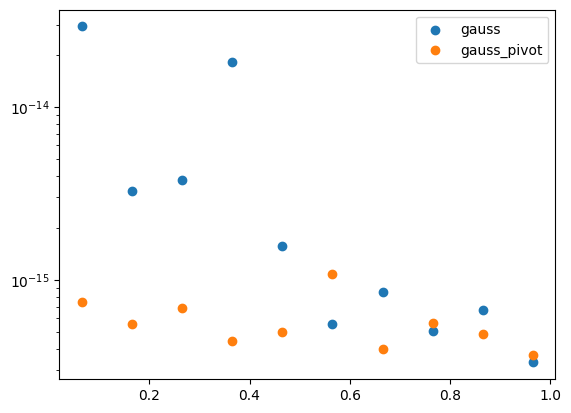

In [7]:
A = np.random.rand(10,10)
b = np.random.rand(10,1)

a_values = []
residuum_gauss_list = []
residuum_gauss_pivot_list = []

for i in range(10):
    a_values.append(A[0,0])
    residuum_gauss_list.append(np.linalg.norm(abs(b-A@(gauss(A, b).reshape(10,1))),2))
    residuum_gauss_pivot_list.append(np.linalg.norm(b-A@(gauss_pivot(A, b).reshape(10,1)),2))
    A[0,0] -= 0.1


print("residuum_gauss_pivot_list:", residuum_gauss_pivot_list)
print("residuum_gauss_list:", residuum_gauss_list)
print("a_values:", a_values)


plt.figure()
plt.scatter(a_values, residuum_gauss_list, label='gauss')
plt.scatter(a_values, residuum_gauss_pivot_list, label='gauss_pivot')
plt.yscale('log')
plt.legend()

## Metody iteracyjne

Innym sposobem na rozwiązanie układu równań liniowych jest wykorzystanie metod iteracyjnych, które generują ciągi przybliżeń wektora stanowiącego rozwiązanie układu. Państwa zadaniem będzie implementacja i porównanie zbieżności trzech najpopularniejszych metod iteracyjnego rozwiązywania układów równań liniowych

***Zadanie 4.***

Porównanie zbieżności metod Jacobiego, Gaussa-Seidla i Younga (SOR).
* Zaimplementuj solvery rozwiązujące układy równań metodami Jacobiego, Gaussa-Seidela  i Younga (SOR). Każda funkcja powinna przyjmować macierz A i wektor prawej strony b. Dla uproszczenia, dopuszczalne jest wykorzystanie  inv dla obliczenia macierzy odwrotnej do macierzy trójkątnej (w metodzie G-S i Younga).
* Porównaj zbieżność ciągów iteracyjnych otrzymanych 3 metodami dla 3 układów równań (3 macierzy). W metodzie Younga możesz przyjąć np. $ω = 1.2$.
* Dla macierzy, dla której metoda Younga okazała się zbieżna, porównaj zbieżność ciągów iteracyjnych otrzymanych dla wartości $0 < ω < 3$ (dodatkowe).
* Dla jakiej wartości parametru $ω$ zbieżność ciągu iteracyjnego jest najlepsza? Wynik otrzymany na podstawie obserwacji ciągu odchyleń od rozwiązania dokładnego należy porównać z wnioskiem płynącym z wykresu zależności promienia spektralnego macierzy iteracji w zależności od parametru $ω$ (dodatkowe).

In [69]:
A = np.random.rand(4, 4)
A += np.eye(4)*10
print('A: ', A)
b = np.random.rand(4, 1)
print('b: ', b)

A:  [[10.73031585  0.57991931  0.91513243  0.64239848]
 [ 0.7877121  10.6861903   0.67936563  0.22722648]
 [ 0.7586735   0.6054964  10.32922171  0.57335828]
 [ 0.24101987  0.23772945  0.73275862 10.2005408 ]]
b:  [[0.91169236]
 [0.71826045]
 [0.95011575]
 [0.89610604]]


In [71]:
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])
b = np.array([6., 25., -11., 15.])

In [75]:
print("Numpy solution: ")
solution = np.linalg.solve(A, b)
print(solution)

Numpy solution: 
[ 1.  2. -1.  1.]


jacobi:  [ 1.  2. -1.  1.]
gauss_seidel:  [ 1.  2. -1.  1.]
sor:  [ 1.  2. -1.  1.]
ITERATION LIMIT
omegas:  [0.         0.05128205 0.1025641  0.15384615 0.20512821 0.25641026
 0.30769231 0.35897436 0.41025641 0.46153846 0.51282051 0.56410256
 0.61538462 0.66666667 0.71794872 0.76923077 0.82051282 0.87179487
 0.92307692 0.97435897 1.02564103 1.07692308 1.12820513 1.17948718
 1.23076923 1.28205128 1.33333333 1.38461538 1.43589744 1.48717949
 1.53846154 1.58974359 1.64102564 1.69230769 1.74358974 1.79487179
 1.84615385 1.8974359  1.94871795 2.        ]
spectral_radius:  [np.float64(1.0), np.float64(0.9660808026344277), np.float64(0.931531899949892), np.float64(0.8963134039579372), np.float64(0.8603802357904914), np.float64(0.8236810376729513), np.float64(0.7861567584497683), np.float64(0.7477387808308403), np.float64(0.7083463893370492), np.float64(0.6678832624954015), np.float64(0.6262324722573195), np.float64(0.5832491079072049), np.float64(0.5387489353527022), np.float64(0.49249003836

Text(0, 0.5, 'error')

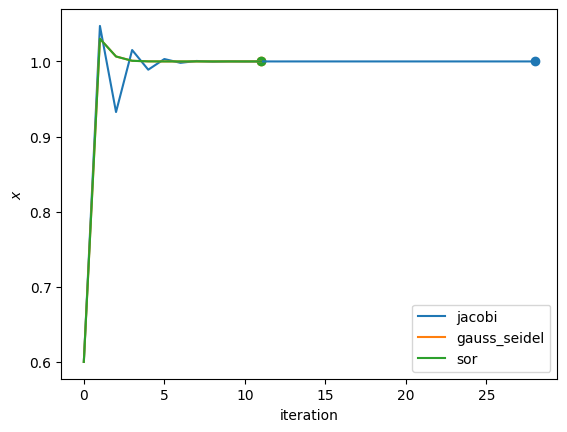

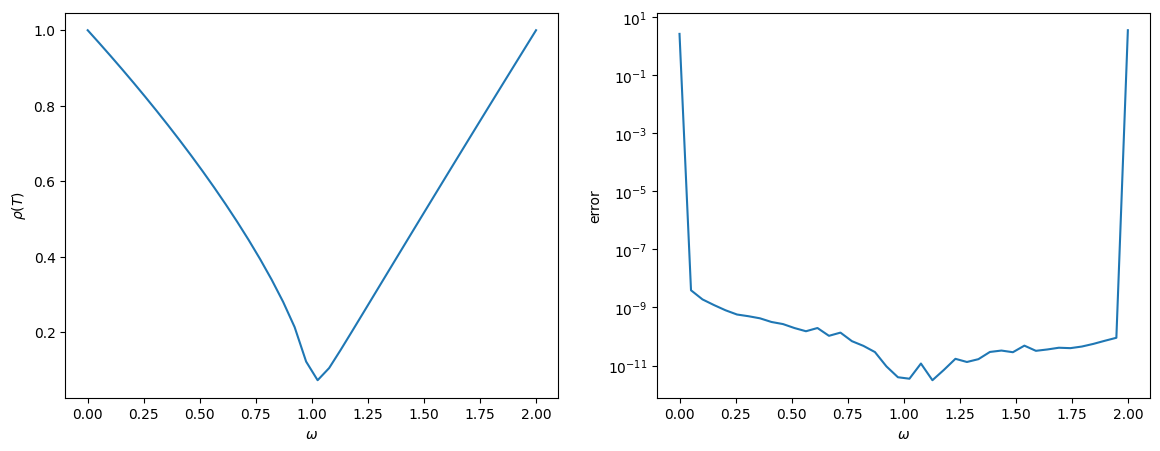

In [96]:
ITERATION_LIMIT = 1000

jacobi_x1 = []

def jacobi(A: np.ndarray, b:np.ndarray) -> np.ndarray:
    L = np.tril(A,-1)
    D = np.tril(np.triu(A))
    U = np.triu(A,1)
    x = np.zeros(b.shape)

    for _ in range(ITERATION_LIMIT):
        x_new: np.float256 = -np.linalg.inv(D)@(L+U)@x+np.linalg.inv(D)@b
        jacobi_x1.append(x_new[0])
        if np.allclose(x, x_new, atol=1e-10, rtol=0):
            return x_new
        else: 
            x = x_new

    print("ITERATION LIMIT")
    return x

gauss_seidel_x1 = []

def gauss_seidel(A: np.ndarray, b:np.ndarray) -> np.ndarray:
    L = np.tril(A,-1)
    D = np.tril(np.triu(A))
    U = np.triu(A,1)
    x = np.zeros(b.shape)

    T_g = -np.linalg.inv(L+D)@U

    for _ in range(ITERATION_LIMIT):
        x_new: np.float256 = T_g@x+np.linalg.inv(L+D)@b
        gauss_seidel_x1.append(x_new[0])
        if np.allclose(x, x_new, atol=1e-10, rtol=0):
            return x_new
        else: 
            x = x_new

    print("ITERATION LIMIT")
    return x

sor_x1 = []
spectral_radius = []

def sor(A: np.ndarray, b:np.ndarray, omega:float = 1) -> np.ndarray:
    L = np.tril(A, k=-1)
    D = np.diag(np.diag(A))
    U = np.triu(A, k=1)
    x = np.zeros(b.shape)

    T_1 = np.linalg.inv(omega*L+D)
    T_g = T_1@((1-omega)*D-omega*U)
    spectral_radius.append(np.max(abs(np.linalg.eigvals(T_g))))

    for _ in range(ITERATION_LIMIT):
        x_new = T_g@x+omega*T_1@b
        sor_x1.append(x_new[0])
        if np.allclose(x, x_new, atol=1e-10, rtol=0):
            return x_new
        else: 
            x = x_new

    print("ITERATION LIMIT")
    return x

print("jacobi: ", jacobi(A, b))
print("gauss_seidel: ", gauss_seidel(A, b))
print("sor: ", sor(A, b))

iterations = np.arange(max(len(jacobi_x1), len(gauss_seidel_x1), len(sor_x1)))
plt.figure()
plt.plot(iterations[:len(jacobi_x1)], jacobi_x1, label='jacobi')
plt.plot(iterations[:len(gauss_seidel_x1)], gauss_seidel_x1, label='gauss_seidel')
plt.plot(iterations[:len(sor_x1)], sor_x1, label='sor')
plt.scatter(iterations[len(jacobi_x1)-1], jacobi_x1[-1])
plt.scatter(iterations[len(gauss_seidel_x1)-1], gauss_seidel_x1[-1])
plt.scatter(iterations[len(sor_x1)-1], sor_x1[-1])
plt.xlabel("iteration")
plt.ylabel("$x$")
plt.legend()

omegas = np.linspace(0, 2, 40)
spectral_radius = []
sor_solution_errors = []

for omega in omegas:
    sor_solution = sor(A, b, omega=omega)
    sor_solution_errors.append(np.linalg.norm(abs(sor_solution-solution), 2))

print('omegas: ', omegas)
print('spectral_radius: ', spectral_radius)
print('sor_solution_errors: ', sor_solution_errors)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(omegas, spectral_radius)
plt.xlabel("$ω$")
plt.ylabel("$ρ(T)$")

plt.subplot(1,2,2)
plt.plot(omegas, sor_solution_errors)
plt.xlabel("$ω$")
plt.yscale('log')
plt.ylabel("error")


## Porównanie rozwiązania za pomocą metody `solve` oraz z użyciem odwrotności na przykładzie macierzy źle uwarunkowanej

***Zadanie 5.***

Dany jest układ równań $Hx=b$.
* H jest macierzą Hilberta o wymiarach $n=5x5$ (I przypadek) i $n=15x15$ (II przypadek),
* b jest wektorem o następujących elementach $b_i = 1/(n + i + 1)$ Uwaga: $i=1,\dots,n$.

Do rozwiązania układu wykorzystaj dwa algorytmy:
1. Z odwracaniem macierzy współczynników H.
2. Metodę `numpy.linalg.solve`.

Porównaj błędy obu rozwiązań. Aby ocenić błąd możesz:
* wyznaczyć wektor residuum otrzymanego rozwiązania,
* rozwiązać układ równań z innym wektorem $b$. Załóż, że wektor rozwiązania ma wszystkie elementy (współrzędne) równe 1 ($u_i = 1, i = 1, 2, . . . , n$). Wtedy $b = Hu$. Układ rozwiążemy bez korzystania z wiedzy o postaci $u$. Dopiero wynik porównamy ze znanym nam $u$.

In [106]:
for n in [5, 15]:
    print('n: ', n)
    H = scipy.linalg.hilbert(n)
    b = np.ones(n)
    print('cond: ', np.linalg.cond(H))
    for i in range(len(b)):
        b[i] /= n+(i+1)+1
    inverse_solution = np.linalg.inv(H)@b
    solution = np.linalg.solve(H, b)
    print('inverse_solution: ', inverse_solution)
    print('solution: ', solution)
    norm_residuum_inverse_solution = np.linalg.norm(abs(H@inverse_solution-b), 2)
    norm_residuum_solution = np.linalg.norm(abs(H@solution-b), 2)
    print('norm_residuum_inverse_solution: ', norm_residuum_inverse_solution)
    print('norm_residuum_solution: ', norm_residuum_solution)


n:  5
cond:  476607.2502422687
inverse_solution:  [ 0.01082251 -0.31168831  2.04545455 -4.84848485  4.09090909]
solution:  [ 0.01082251 -0.31168831  2.04545455 -4.84848485  4.09090909]
norm_residuum_inverse_solution:  1.1800823524349203e-12
norm_residuum_solution:  1.6711069443220838e-16
n:  15
cond:  3.67568286586649e+17
inverse_solution:  [-2.52620906e-02  1.11441898e+00 -3.20996857e+00  1.98071289e+00
 -3.96582031e+00  1.91484375e+01 -2.42187500e+01 -2.06250000e+00
  2.26250000e+01  3.75000000e+00 -4.42500000e+01  3.42500000e+01
  1.24375000e+01 -3.09375000e+01  1.39967041e+01]
solution:  [ 1.36567910e-06 -2.13999504e-04  8.27411991e-03 -1.37638708e-01
  1.21905879e+00 -6.35333114e+00  2.02423466e+01 -3.84936965e+01
  3.64337529e+01  4.17203006e+00 -4.69481288e+01  3.55735904e+01
  1.22179954e+01 -3.09027171e+01  1.39686756e+01]
norm_residuum_inverse_solution:  0.09372673054032116
norm_residuum_solution:  2.0036829624022413e-15


**Zadanie domowe. Znaczenie wskaźnika uwarunkowania macierzy w szacowaniu błędu rozwiązania**


Dana jest następująca macierz A współczynników układu dwóch równań liniowy:
$$A=\begin{bmatrix}10^5 & 9.9\cdot10^4\\1.00001& 0.99\end{bmatrix}$$

Wektor prawej strony równania $Ax=b$ dla rozwiązania x = $[1, 1]^T$ możemy wyznaczyć z równości $b = Ax$.

Należy:
* obliczyć wskaźnik uwarunkowania macierzy $A$,
* rozwiązać układ równań $Ax = b$ (nie korzystając z wiedzy o przyjętym rozwiązaniu dokładnym x) korzystając z funkcji `np.linalg.solve`,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania macierzy A,
* przeprowadzić skalowanie tak, aby macierz $A$ była wyważona wierszami,
* wyznaczyć nowe wartości wektora b tak, aby rozwiązanie dokładne się nie
zmieniło,
* obliczyć wskaźnik uwarunkowania macierzy skalowanej,
* rozwiązać układ równań tą samą metodą jak poprzednio,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania skalowanej macierzy $A$.
1. Czy błąd numeryczny rozwiązania w obu przypadkach jest tego samego rzędu?
2. Które szacowanie błędu jest bardziej zbliżone do faktycznego błędu?

In [143]:
A = np.array([[10**5, 9.9e4], [1.00001, 0.99]])
cond = np.linalg.cond(A)
print('cond\n', cond)

x_real = np.array([[1], [1]])

b = A@x_real
print('b\n', b)

x = np.linalg.solve(A, b)
print('x\n', x)

error = x_real - x
print('error: ', error)
print('sum of error - abs(x_real - x):\n', np.sum(abs(error)))

error_estimate = cond * (np.linalg.norm(b-A@x, 2))/(np.linalg.norm(b, 2))
print('error_estimate\n', error_estimate)

# SKALOWANIE WIERSZY

for i in range(A.shape[0]):
    print(np.sum(A[i])) 
# 199000.0
# 1.99001

A[1] *= (199000.0/1.99001)

for i in range(A.shape[0]):
    print(np.sum(A[i])) 
# 199000.0
# 199000.0

# teraz macierz A jest wyważona wierszami
print("---")

b = A@x_real
print('b\n', b)
cond = np.linalg.cond(A)
print('cond\n', cond)

x = np.linalg.solve(A, b)
print('x\n', x)

error = x_real - x
print('error: ', error)
print('sum of error - abs(x_real - x):\n', np.sum(abs(error)))

error_estimate = cond * (np.linalg.norm(b-A@x, 2))/(np.linalg.norm(b, 2))
print('error_estimate\n', error_estimate)


cond
 20001010102.66865
b
 [[1.99000e+05]
 [1.99001e+00]]
x
 [[1.]
 [1.]]
error:  [[ 1.11022302e-11]
 [-1.12143628e-11]]
sum of error - abs(x_real - x):
 2.2316593017990272e-11
error_estimate
 2.2317167769480215e-11
199000.0
1.99001
199000.0
199000.0
---
b
 [[199000.]
 [199000.]]
cond
 400022.2222179
x
 [[1.]
 [1.]]
error:  [[0.]
 [0.]]
sum of error - abs(x_real - x):
 0.0
error_estimate
 0.0


1. **Czy błąd numeryczny rozwiązania w obu przypadkach jest tego samego rzędu?**

Nie, kiedy macierz jest wyważona wierszami, bład jest o wiele mniejszy (zerowy), jest to spowodowane mniejszym współczynnikiem uwarunkowania macierzy A po skalowaniu.

2. **Które szacowanie błędu jest bardziej zbliżone do faktycznego błędu?**

W drugim przypadku górna granica oszacowania błędu wyniosła 0 co odzwierciedla rzeczywisty brak błędu. Więc poprawną odpowiedzią będzie stwierdzenie że drugie szacowanie.